In [ ]:
from IPython.display import Image
import numpy as np
import pandas as pd
import scipy.stats
from scipy.stats import norm
import scipy as sp
import statistics

# Image("netology-logo.png")

In [7]:
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)
    return m-h,m, m+h#,h

a = [5,7,7,9,10,16,7,14,13,15,16,15,16,17,18,13,14,15,6,13]


print(mean_confidence_interval(a, 0.95))
 

(10.391179971291619, 12.3, 14.208820028708383)


# Выборы в президенты или зачем нам доверительные интерваллы?!

In [ ]:
# Image("votting_usa.png")

In [8]:
df = pd.read_csv('2012_US_elect_county.csv', sep=',') # Откроем датасет
df.dropna(how='any',inplace=True)  #Удалим пустые значения
df=df[df['%']!='#DIV/0!'][['State Postal','County Name','%']] #Удалим мусор из данных и оставим только нужное
df['%'] = df['%'].astype(float) # Приведем к численному значению результаты голосования
df

,State Postal,County Name,%
0,AK,Alaska,41.6
1,AK,Alaska,41.6
2,AL,Alabama,38.4
3,AL,Autauga,26.6
4,AL,Baldwin,21.6
...,...,...,...
4069,WV,Webster,34.2
4070,WV,Wetzel,37.8
4071,WV,Wirt,31.1
4072,WV,Wood,32.9


Среднее по всей выборке:  44.07946954813359


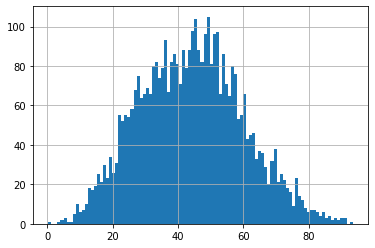

In [12]:
df['%'].hist(bins=100)
print('Среднее по всей выборке: ',df['%'].mean())

In [17]:
some_states_1= ['AK','OH','WV','ME','CA','MD']
some_states_2 = ['WA','AK','DE']
some_states_3 = ['AZ','RI','MA']



sub_df = df.loc[df['State Postal'].isin(some_states_2)]  # Выборка по нескольким штатам
l,s,r = mean_confidence_interval(sub_df['%'], 0.95)
l,s,r

(43.08121379244103, 46.23478260869565, 49.38835142495028)

In [18]:
df['State Postal'].value_counts()  #Расскоментить, если интересно соотношение штатов. 

ME    498
MA    352
TX    255
VT    247
NH    238
VA    135
KY    121
MO    116
KS    106
IL    103
NC    101
IA    100
TN     96
NE     94
IN     93
OH     89
MN     88
MI     84
MS     83
OK     78
AR     75
WI     73
PA     68
AL     68
SD     67
LA     65
NY     63
CA     59
MT     57
WV     56
ND     54
ID     45
WA     40
RI     40
OR     37
NM     34
MD     25
NJ     22
NV     18
AZ     16
HI      5
DE      4
AK      2
DC      2
Name: State Postal, dtype: int64

In [ ]:
# Image("ArticleImage.png")

### Расмотрим теперь другой пример. Допустим, вы журналист и оказались в 2016 году в предверии выборов презедента в США и хотите по результатам своих исследований достаточно точно определить, кто победит на этих выборах. Сколько вам необходимо опросить людей, чтобы назвать будущего президента с точность в 95%???

95%. Результаты предшествующих исследований свидетельствуют, что стандартное отклонение генеральной совокупности приблизительно равно 25 долл. Таким образом, е = 5, σ = 25 и Z = 1,96

In [ ]:
# Image("formuls.png")

In [19]:
sigma = 15
Z = 1.96  # 95%
e = 5 #%

N = ((sigma*Z)/e)**2
N 

34.5744

In [34]:
Z = round(norm.ppf((0.95 + 1) / 2), 2)
Z

1.96

# Проверим:

Стандартное отклонение:  15.742396788859017
Среднее:  44.07946954813359


<AxesSubplot:>

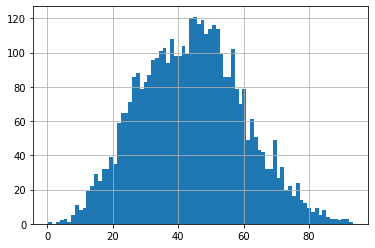

In [35]:
df = df['%']
print('Стандартное отклонение: ',df.std())
print('Среднее: ',df.mean())
df.hist(bins=80)

In [36]:
MEAN = df.sample(n = int(N)).mean()  # Возьмем выборку из случайных n значений
print('Среднее выборки: ', MEAN)
print('Среднее генеральной совокупности: ',df.mean())
MEAN-e, MEAN+e 

Среднее выборки:  40.53235294117648
Среднее генеральной совокупности:  44.07946954813359


(35.53235294117648, 45.53235294117648)

In [38]:
from scipy.stats import norm
norm.ppf(0.95, loc=0, scale=1), norm.ppf(0.95), 

(1.6448536269514722, 1.6448536269514722)

In [ ]:
#Test with sample with identical means:

Ttest_indResult(statistic=2.3222628424612353, pvalue=0.02031882732222445)
Ttest_indResult(statistic=2.3402117997223493, pvalue=0.019498792671778672)


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

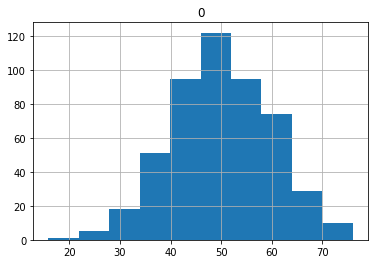

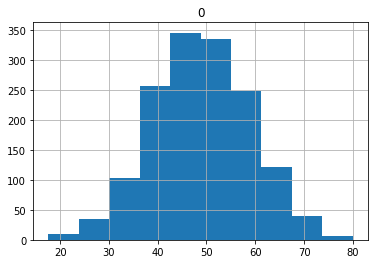

In [48]:
from scipy import stats
np.random.seed(12345678)
 
rvs1 = stats.norm.rvs(loc=50,scale=10,size=500)
rvs2 = stats.norm.rvs(loc=49,scale=10, size=1500)

print(stats.ttest_ind(rvs1,rvs2))
print(stats.ttest_ind(rvs1,rvs2, equal_var = False))
pd.DataFrame(rvs1).hist()
pd.DataFrame(rvs2).hist()

# Проверка гипотез

### t-Тест Стьюдента

Ttest_indResult(statistic=-2.3581400001530137, pvalue=0.02988025579511584)
Ttest_indResult(statistic=-2.3581400001530137, pvalue=0.030432531616417197)
t = 2.3581400001530137
p = 0.02988025579511584


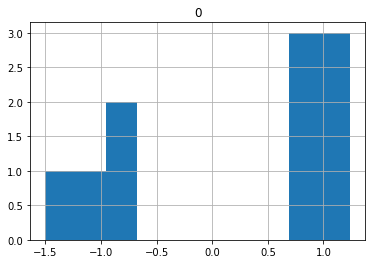

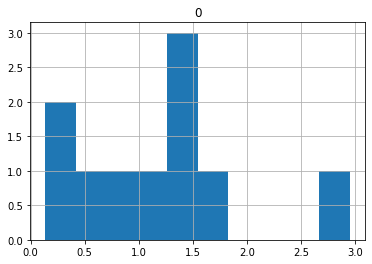

In [53]:
## Определим 2 случайных распределения
N = 10  #Размер выборок


b = np.random.randn(N) #Нормальное распределение с mean = 0 and var = 1
a = np.random.randn(N) + 1.5 #Нормальное распределение с mean = 2 and var = 1

print(stats.ttest_ind(b,a))
print(stats.ttest_ind(b,a, equal_var = False))
pd.DataFrame(b).hist()
pd.DataFrame(a).hist()
 
### мы получаем хорошее значение p, равное 0,0005, и, таким образом, мы отклоняем нулевую гипотезу и, таким образом,
### это доказывает, что средние значения двух распределений различны и различие статистически значимо.
 
t , p  = stats.ttest_ind(a,b)
print("t = " + str(t))
print("p = " + str(p))

# A large t-score tells you that the groups are different.
# A small t-score tells you that the groups are similar.

# a. One-sample T-test with Python

Давайте попробуем это на одном образце. Тест покажет нам, отличаются ли средние значения выборки и генеральной совокупности. Рассмотрим количество голосующих в Индии и население всего Мира. Отличается ли средний возраст избирателей Индии от возраста населения? Давай выясним.

In [63]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
 
np.random.seed(6) 
population_ages1=stats.norm.rvs(loc=18,scale=45,size=150000)  #Мир
population_ages2=stats.norm.rvs(loc=18,scale=10,size=100000)
population_ages=np.concatenate((population_ages1,population_ages2))


india_ages1=stats.norm.rvs(loc=18,scale=45,size=3000)  # Индия
india_ages2=stats.norm.rvs(loc=18,scale=35,size=3000)
india_ages=np.concatenate((india_ages1,india_ages2))
population_ages.mean()


17.962669794272227

In [64]:
india_ages.mean()


18.894017967980226

In [65]:
stats.ttest_1samp(a=india_ages,popmean=population_ages.mean())
#Теперь это значение 1.807 говорит нам, насколько отклоняется выборочное среднее от нулевой гипотезы.

Ttest_1sampResult(statistic=1.8078631548305495, pvalue=0.07067786473788343)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

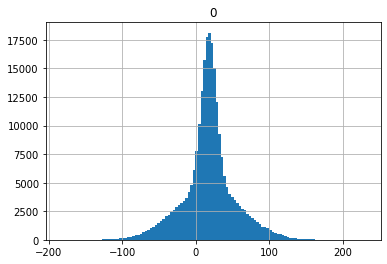

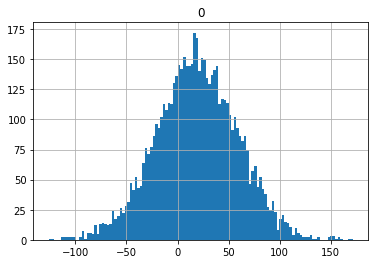

In [66]:
pd.DataFrame(population_ages).hist(bins=120)
pd.DataFrame(india_ages).hist(bins=120)

# b. Two-sample T-test With Python

Такой тест показывает, имеют ли две выборки данных разные средние значения. Здесь мы принимаем нулевую гипотезу о том, что обе группы имеют равные средние. Для этого нам не нужен известный параметр численности.

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

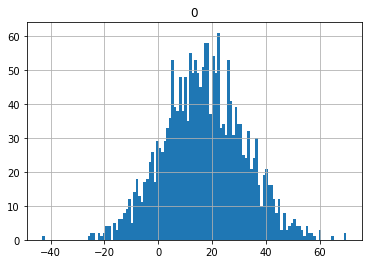

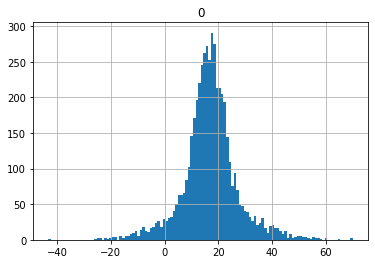

In [68]:
np.random.seed(12)
maharashtra_ages1=stats.norm.rvs(loc=17,scale=5,size=3000)
maharashtra_ages2=stats.norm.rvs(loc=17,scale=15,size=2000)
pd.DataFrame(maharashtra_ages2).hist(bins=120)

maharashtra_ages=np.concatenate((maharashtra_ages1,maharashtra_ages2))
maharashtra_ages.mean()
pd.DataFrame(maharashtra_ages).hist(bins=120)

In [69]:
stats.ttest_ind(a=india_ages,b=maharashtra_ages,equal_var=False)
#The value of 0.152 tells us there’s a 15.2% chance that the sample data is such far apart 
#for two identical groups. This is greater than the 5% confidence level.


#Значение 0,152 говорит о том, что существует вероятность 7,2% того, что выборочные данные для двух 
#идентичных групп сильно различаются. Это больше, чем уровень достоверности 5%.

Ttest_indResult(statistic=3.6656508906368277, pvalue=0.00024855518745710086)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

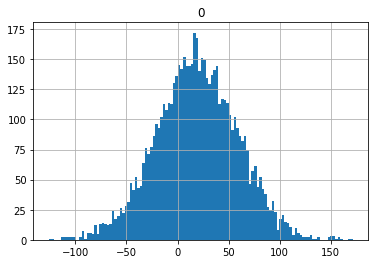

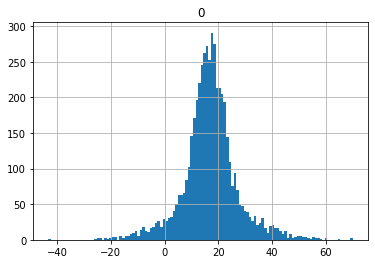

In [70]:
pd.DataFrame(india_ages).hist(bins=120)
pd.DataFrame(maharashtra_ages).hist(bins=120)

# c. Paired T-test With Python

T-критерий парной выборки, иногда называемый t-критерием зависимой выборки, представляет собой статистическую процедуру, используемую для определения того, равна ли нулю средняя разница между двумя наборами наблюдений. В парном выборочном t-тесте каждый субъект или объект измеряется дважды, в результате чего получаются пары наблюдений. Общие применения парного t-критерия выборки включают исследования случай-контроль или планы повторных измерений. 

Предположим, вас интересует оценка эффективности программы обучения компании. Один из подходов, который вы можете рассмотреть, - это измерение производительности выборки сотрудников до и после завершения программы и анализ различий с использованием парного выборочного t-критерия.

In [71]:
np.random.seed(11)
before=stats.norm.rvs(scale=30,loc=250,size=100)
after=before+stats.norm.rvs(scale=5,loc=-1.25,size=100)
weight_df=pd.DataFrame({"weight_before":before,
                         "weight_after":after,
                         "weight_change":after-before})
weight_df.describe()

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,250.345546,249.115171,-1.230375
std,28.132539,28.422183,4.783696
min,170.400443,165.913930,-11.495286
25%,230.421042,229.148236,-4.046211
50%,250.830805,251.134089,-1.413463
75%,270.637145,268.927258,1.738673
max,314.700233,316.720357,9.759282


In [72]:
stats.ttest_rel(a=before,b=after)
# Итак, мы видим, что у нас есть только 1% шансов найти такие огромные различия между образцами.

Ttest_relResult(statistic=2.5720175998568284, pvalue=0.011596444318439857)

# Практическое применение t-Тест Стьюдента

Представим, что вы следователь какой-то крупной рекламной компаннии. 
Ваша задача иследовать рыннок манго в течени последних нескольких лет.
У вас уже есть предварительные данные. Ваши подчиненные решили схалтурить и принести вам совсем другие отчеты. 
Сможели ли вы их разоблачить с помощью t-Тест Стьюдента и уволить?

In [ ]:
Image("prof_redaktor.jpg")

In [73]:
df1 = pd.read_csv('avocado.csv', sep=',', index_col=0).AveragePrice[:1000]
df2 = pd.read_csv('StudentsPerformance.csv', sep=',', index_col=0)['math score']
 
t, p = stats.ttest_ind(df1 ,df2)
t,p

(-135.56983375430264, 0.0)

<AxesSubplot:>

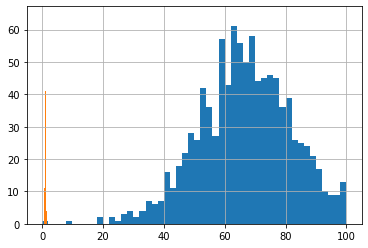

In [74]:
# и действительно выборки пренадлежать разным распределениям
df2.hist(bins=50)
df1.hist(bins=50)

# $Хи^{2}-  Пирсона$

In [75]:
 
import scipy as sp

# Сгенерируем случайную матрицу 2х2
X = np.random.randint(2, size=50).reshape(10, 5)
y = np.random.randint(2, size=10) 
contingency_table = sp.sparse.coo_matrix( (np.ones_like(y), (X[:, 0], y)),    
                                         shape=(np.unique(X[:, 0]).shape[0], 
                                                np.unique(y).shape[0])).A


print(contingency_table)
chi2, p, do, expected =  sp.stats.chi2_contingency(contingency_table)

print(chi2, p, do)

print(expected)

# Возвращает:
# chi2 : The test statistic.
# p : The p-value of the test
# dof : Degrees of freedom
# expected : Ожидаемые частоты, основанные на предельных суммах таблицы.

[[3 2]
 [2 3]]
0.0 1.0 1
[[2.5 2.5]
 [2.5 2.5]]


In [76]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency

table = [[10, 20, 30],[6,  9,  17]]
print(np.array(table))
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

[[10 20 30]
 [ 6  9 17]]
stat=0.272, p=0.873
Probably independent


In [77]:
subjects = pd.DataFrame(
    [
        [25,46,15],
        [15,44,15],
        [10,10,20]
    ],
    index=['Biology','Chemistry','Physics'],
    columns=['Math SL AA','Math SL AI','Math HL'])
subjects

,Math SL AA,Math SL AI,Math HL
Biology,25,46,15
Chemistry,15,44,15
Physics,10,10,20


Если рассчитанный хи-квадрат больше критического значения, мы отклоняем нулевую гипотезу.

In [78]:
chi, pval, dof, exp = scipy.stats.chi2_contingency(subjects) #  
print('p-value is: ', pval)
significance = 0.05
p = 1 - significance
critical_value = scipy.stats.chi2.ppf(p, dof)
print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))



if chi > critical_value:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
        They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
        They are independent.""" % (significance))

p-value is:  0.0004176680832291999
chi=20.392835, critical value=9.487729

At 0.05 level of significance, we reject the null hypotheses and accept H1. 
        They are not independent.


В качестве альтернативы мы можем сравнить p-значение и уровень значимости. Если значение p <уровня значимости, мы отклоняем нулевую гипотезу.

In [79]:
chi, pval, dof, exp = scipy.stats.chi2_contingency(subjects)
significance = 0.05
print('p-value=%.6f, significance=%.2f\n' % (pval, significance))


if pval < significance:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
            They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
            They are independent.""" % (significance))

p-value=0.000418, significance=0.05

At 0.05 level of significance, we reject the null hypotheses and accept H1. 
            They are not independent.


# точный критерий Фишера 

In [80]:
import scipy as sp

x = [[107,93],[74,45]]
 
oddsratio, pvalue = sp.stats.fisher_exact(x)
pvalue

0.1607594221528123

# Проанализируем теперь рынок жилья в New York City

New York City Airbnb Open Data
Airbnb listings and metrics in NYC, NY, USA (2019)

In [ ]:
Image("BARRIOS_NY.jpg")

In [81]:
df = pd.read_csv('AB_NYC_2019.csv')
df.dropna(how='any',inplace=True)
df.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<AxesSubplot:>

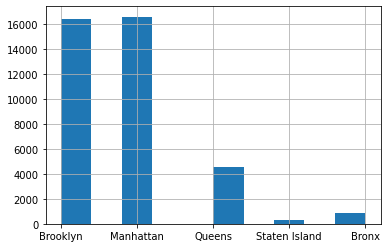

In [82]:
df.neighbourhood_group.hist()

<AxesSubplot:>

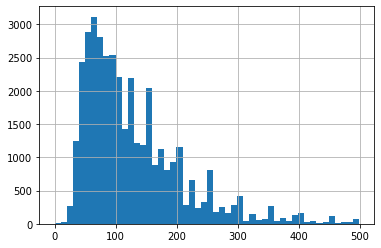

In [83]:
df[df.price<500].price.hist(bins=50)

In [84]:
print(df[df.price<400].price.mean())

df = pd.read_csv('AB_NYC_2019.csv')
df.dropna(how='any',inplace=True)

data = df[(df.neighbourhood_group == 'Brooklyn') | (df.neighbourhood_group=='Staten Island') | (df.neighbourhood_group=='Queens')].price

mean_confidence_interval(data, confidence=0.95) # Возможно вам понадобиться эта функция.

122.56345677697612


(113.2274769237582, 115.49388042203987, 117.76028392032153)

# Задания для самостоятельного решения


1. Найдите минимально необходимый объем выборки для построения интервальной оценки среднего с точностью ∆ = 3, дисперсией σ^2 = 225 и уровнем доверия β = 0.95.

In [59]:
### Code
# Задание № 1. Где-то ошибка. Посмотрите пример расчета из лекции. Ожидаемый ответ меньше 100.
def get_data_size(accuracy_mean, sigma, confidential_level):
    standard_normal_cumulative_distribution = round(norm.ppf(( confidential_level + 1 ) / 2), 2)
    return round(pow((( sigma * standard_normal_cumulative_distribution ) / accuracy_mean ), 2), 0)

print(get_data_size(3, np.sqrt(225), 0.95))

96.0


2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

Ttest_indResult(statistic=1.92707842901265, pvalue=0.05396988224999721)
Ttest_indResult(statistic=2.0008083711837092, pvalue=0.045435478408895294)


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

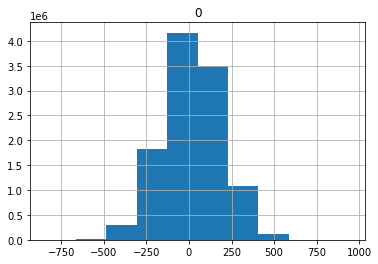

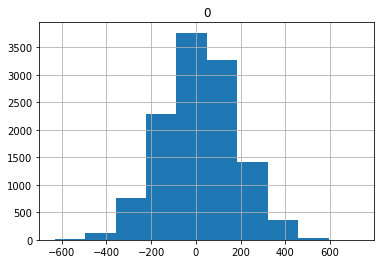

In [57]:
import scipy.stats as stats

population_men = stats.norm.rvs(loc=19, scale=171, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=16, scale=165, size=12000)  # Выборка женщин со средним ростом 165

### Code

print(stats.ttest_ind(population_men, population_women))
print(stats.ttest_ind(population_men, population_women, equal_var = False))
pd.DataFrame(population_men).hist()
pd.DataFrame(population_women).hist()

# Высокй t-score говорит, что выборки скорее не похожи
# Высокй p-value говорит, что выборки скорее не похожи

3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

In [62]:
### Code

print(get_data_size(50, 150, 0.95))

35.0


4.  Представьте, что вы хотите разоблачить "волшебника", который считает, что умеет предсказывать погоду на завтра. Отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого периода времени и получили такие результаты (см.ниже). Можно ли сказать, что маг действительно умеет предсказывать погоду, 
если уровнь значимости принять за 0.05 ?

In [86]:
observations = pd.DataFrame([[25,36],[15,44]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,25,36
Солнце,15,44


In [108]:
# Code
print('---')
oddsratio, pvalue = sp.stats.fisher_exact(observations)  # Возможно вам пригодится эта функция.
print('Вероятно прогноза волшебника составляет (тест Фишера): ', round(pvalue * 100, 0), '%')
print('---')
t , p  = stats.ttest_ind(observations['Ответ волшебника'], observations['Реальность'])
print('Вероятно прогноза волшебника составляет (Т-критерий для средних значений двух независимых выборок оценок): ', round(p * 100, 0), '%')
print('---')
t, p = stats.ttest_1samp(a=observations['Ответ волшебника'],popmean=observations['Реальность'].mean())
print('Вероятно прогноза волшебника составляет (Т-тест для среднего значения ОДНОЙ группы баллов): ', round(p * 100, 0), '%')
print('---')
t, p = stats.ttest_rel(a=observations['Ответ волшебника'], b=observations['Реальность'])
print('Вероятно прогноза волшебника составляет (t-критерий по ДВУМЯ СВЯЗАННЫМ выборкам баллов): ', round(p * 100, 0), '%')
print('---')
chi, p, dof, expected =  sp.stats.chi2_contingency(observations)
print('Вероятно прогноза волшебника составляет (хи-квадрат независимости переменных в таблице сопряженности): ', round(p * 100, 0), '%')
significance = 0.05
p = 1 - significance
critical_value = scipy.stats.chi2.ppf(p, dof)
print('chi=%.6f, critical value=%.6f' % (chi, critical_value))
if chi > critical_value:
    print("""На %.2f уровне значимости, мы отклоняем нулевые гипотезы и принимаем H1. Они не являются независимыми.""" % (significance))
else:
    print("""На %.2f уровне значимости, мы принимаем нулевые гипотезы. Они независимы.""" % (significance))
print('p-value=%.6f, significance=%.2f' % (p, significance))
if p < significance:
    print("""На %.2f уровне значимости, мы отвергаем нулевые гипотезы и принимаем H1. Они не независимы.""" % (significance))
else:
    print("""На %.2f уровне значимости, мы принимаем нулевые гипотезы. Они независимы.""" % (significance))

---
Вероятно прогноза волшебника составляет (тест Фишера):  8.0 %
---
Вероятно прогноза волшебника составляет (Т-критерий для средних значений двух независимых выборок оценок):  9.0 %
---
Вероятно прогноза волшебника составляет (Т-тест для среднего значения ОДНОЙ группы баллов):  16.0 %
---
Вероятно прогноза волшебника составляет (t-критерий по ДВУМЯ СВЯЗАННЫМ выборкам баллов):  27.0 %
---
Вероятно прогноза волшебника составляет (хи-квадрат независимости переменных в таблице сопряженности):  11.0 %
chi=2.604890, critical value=3.841459
На 0.05 уровне значимости, мы принимаем нулевые гипотезы. Они независимы.
p-value=0.950000, significance=0.05
На 0.05 уровне значимости, мы принимаем нулевые гипотезы. Они независимы.


In [ ]:
# Задание № 4. Оценки верные, но хотелось бы конечно более полный комментарий для полученного p-value.
# Ответ: p-value больше 5%, это означает, что 
# вероятность ошибочного заключения о существовании различий между 
# предсказаниями волшебника и реальной погоды превышает 5%. Другими словами, волшебник иногда угадывает погоду.

5. Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия 90% для выборки: data = [1,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5]


(0.6789175235250494, 1.1630409636010888, 1.6471644036771282)


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

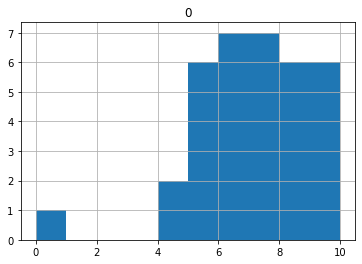

In [116]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

### Code
print(mean_confidence_interval(a, 0.90))
pd.DataFrame(data).hist()

6. Принадлежит ли выборка data_1 и data_2 одному множеству? Оцените это с помощью известных вам тестов проверки гипотез.

In [ ]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

# Code
t , p  = stats.ttest_ind(data_1, data_2)
print(t , p)
t, p = stats.ttest_1samp(a=data_1,popmean=statistics.mean(data_2))
print(t , p)

pd.DataFrame(data_1).hist()
pd.DataFrame(data_2).hist()
pd.DataFrame(np.concatenate((data_1, data_2))).hist()

# Вывод: выборки не пренадлежат одному множеству, т.к. p-value меньше 0.05

7.35744682757447 2.1159475572725764e-11
8.107648536812547 1.8719811897237842e-09


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

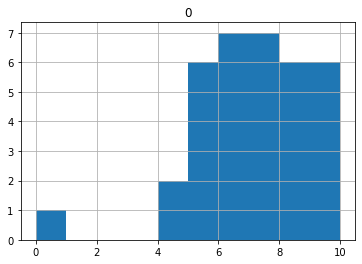

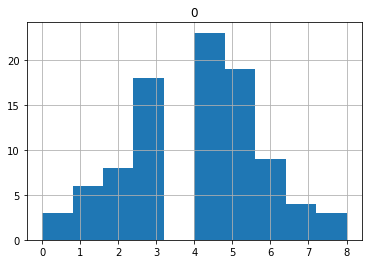

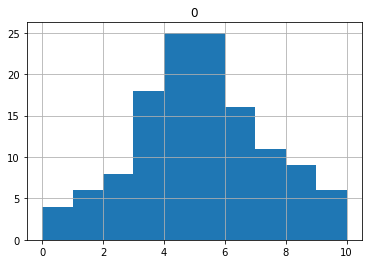

In [150]:
7. На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

Предположим, Вы сформировали две гипотезы:
Нулевая гипотеза - распределение нормальное, 
Альтернативная гипотеза - распределение не нормальное.


Допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости (p-value) = 0.03.
Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет? Вопрос без подвоха)

7. На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

Предположим, Вы сформировали две гипотезы:
Нулевая гипотеза - распределение нормальное, 
Альтернативная гипотеза - распределение не нормальное.


Допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости (p-value) = 0.03.
Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет? Вопрос без подвоха)

In [ ]:
# Такое p-value указывает на то, что гипотеза статистически значима, 
# другими словами нулевая гипотеза подтверждается и распределение - нормальное.

8. Первая выборка — это пациенты, которых лечили препаратом А. 
Вторая выборка — пациенты, которых лечили препаратом Б. Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

а) Требуется выяснить, имеется ли значимое различие эффективности препаратов А и Б, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (уровень значимости принять за 5% или 0.05)

b) При каком минимальном P-values различия были бы уже значимы? 

Ttest_indResult(statistic=0.33196234898293125, pvalue=0.7400341626811637)


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

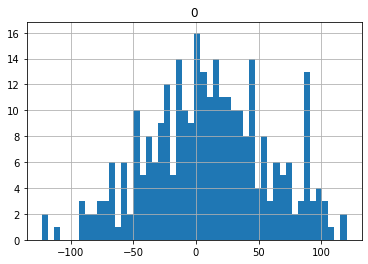

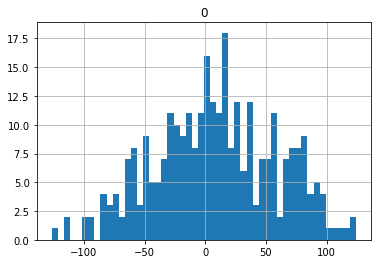

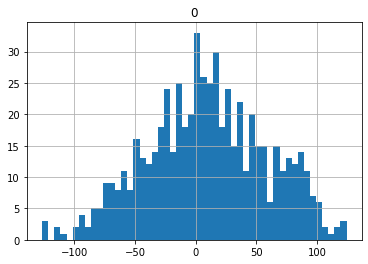

In [159]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-1.25,size=300)

#Ваш код:
# Подсказка, обратити внимание на Two-sample T-test

print(stats.ttest_ind(a=A, b=B, equal_var=False))
pd.DataFrame(A).hist(bins=50)
pd.DataFrame(B).hist(bins=50)
pd.DataFrame(np.concatenate((A, B))).hist(bins=50)

# Вывод: различине не является статистически значимым, различия являются чисто случайными 
# и объясняются «естественной» дисперсией выбранной характеристики. При P-values <0.05 различия будут значимы.